<a href="https://colab.research.google.com/github/Moussa976/eval_python/blob/master/M1_TL_Moussa_INSSA_netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

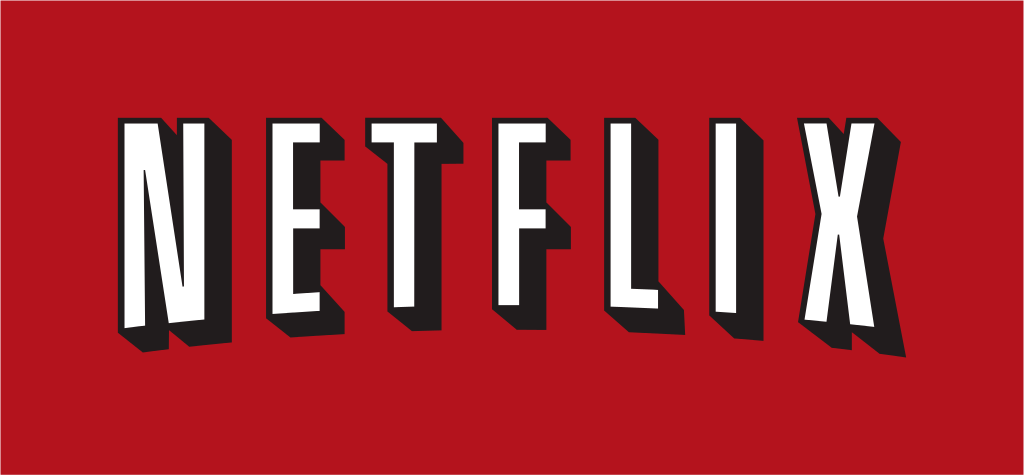
#Netflix Movies and TV Shows

## L'importation des librairies et du fichier netflix_titles.csv

In [73]:
#Importation des librairies
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 


In [74]:
#Lien de la data 
#https://www.kaggle.com/shivamb/netflix-shows
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/exos_graphs'
# import du fichier netflix_titles.csv, on précise ici les colonnes utilisés
data = pd.read_csv(root_path+"/netflix_titles.csv", usecols = ['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'])
print("dataset loaded")
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
dataset loaded


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


##Informations de notre dataset

In [75]:
# informations sur le contenu de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Nous pouvons observer qu'on a 6234 entrées sur le contenu de notre dataset et assez peu de colonnes.


Les colonnes correspondent à:

 - **show_id**: correspond à l'identifiant du nouvelle entrée
 - **type** :  correspond au type de programme entré (Movie ou TV Show)
 - **title** : corrspond au titre 
 - **director** : correspond au nom de directeur 
 - **cast** : correspond au noms des acteurs
 - **country** : correspond au nom du pays
 - **date_added** : correspond à la date ajout
 - **release_year** : correspond à l'année sortie
 - **rating** : correspond à l'audimat 
 - **duration** : correspond à la durée du film ou de la saison
 - **listed_in** : correspond à la catégorie d'âge 
 - **description** : correspond à la description du film ou série

## Analyse des données Netflix

<Figure size 2160x432 with 0 Axes>

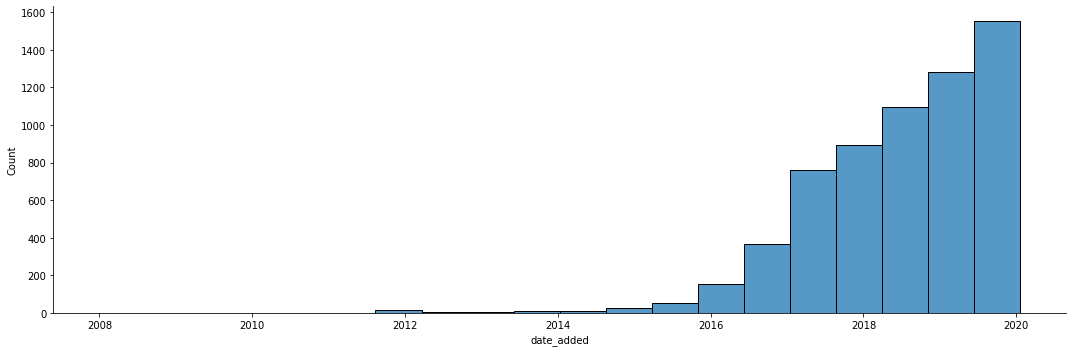

In [94]:
# Conversion de la date 
data['date_added'] = pd.to_datetime(data['date_added'])
# Affichage des films et séries en fonction de la date
plt.figure(figsize=(30,6))
sns.displot(data.date_added, bins=20, kde=False, aspect= 3)

In [97]:
# Les valeurs vides 
data.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [96]:
""" Fonction qui permet de calculer le % de données manquantes"""
def donnees_manquantes(dataset, liste_colonnes):
    for colonne in liste_colonnes:
        pourcentage = round((dataset[colonne].isnull().sum()/dataset.shape[0]) * 100, 2)
        print ("Données manquantes pour {}: {}%".format(colonne,pourcentage))
    
donnees_manquantes(data, ['director', 'cast', 'country','date_added' ])

Données manquantes pour director: 31.58%
Données manquantes pour cast: 9.14%
Données manquantes pour country: 7.64%
Données manquantes pour date_added: 0.18%


In [99]:
data.show_id.count()

6234

## Analyse des données sur les Movies/TV Shows

Dans cette partie, nous allons nous focaliser sur les différents types de programmes Netflix tels que **TV Shows (Séries TV)** et **Movies (Films)**. 

In [76]:
# on liste les valeurs possibles des types de programme
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [77]:
# On crée le dataset Movie
movie = data[data['type'] == 'Movie'].copy()
# On crée de dataset TV Show
tv_show = data[data['type'] == 'TV Show'].copy()

In [78]:
# informations sur le contenu de notre dataset Movie et TV Show
print(movie.info(), tv_show.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4265 entries, 0 to 6231
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4265 non-null   int64 
 1   type          4265 non-null   object
 2   title         4265 non-null   object
 3   director      4137 non-null   object
 4   cast          3905 non-null   object
 5   country       4070 non-null   object
 6   date_added    4264 non-null   object
 7   release_year  4265 non-null   int64 
 8   rating        4257 non-null   object
 9   duration      4265 non-null   object
 10  listed_in     4265 non-null   object
 11  description   4265 non-null   object
dtypes: int64(2), object(10)
memory usage: 433.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 2 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1969 non-null   int64 
 1   type          

In [79]:
print(len(movie.show_id)," movies et ",len(tv_show.show_id)," tv shows") # Se rassurer qu'il y a 4265 Movie et 1969 TV Show

4265  movies et  1969  tv shows


In [80]:
# Affichages des Movies
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [81]:
# Affichages des TV Shows
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


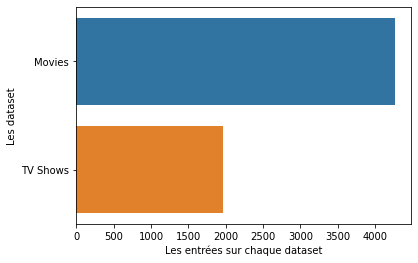

In [82]:
# Les entrées sur chaque dataset sur un graphique à barres
lesdataset = pd.DataFrame({'cat': ['Movies', 'TV Shows'], 'val': [len(movie.show_id), len(tv_show.show_id)]})
ax = sns.barplot(x='val', y='cat', data=lesdataset)
ax.set(xlabel='Les entrées sur chaque dataset', ylabel='Les dataset')
plt.show()

# Les entrées sur chaque dataset sur un graphique en anneau
# plt.pie(data['type'].value_count(), labels=['Movies', 'TV Shows'], explode = [0,0.1],startangle=90, labeldistance=1.2)
# plt.title('Types de programme')
# plt.legend()
# plt.show()

In [83]:
# Conversion de la colonne 'date_added' au format date
movie['date_added'] = pd.to_datetime(movie['date_added'])
tv_show['date_added'] = pd.to_datetime(tv_show['date_added'])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


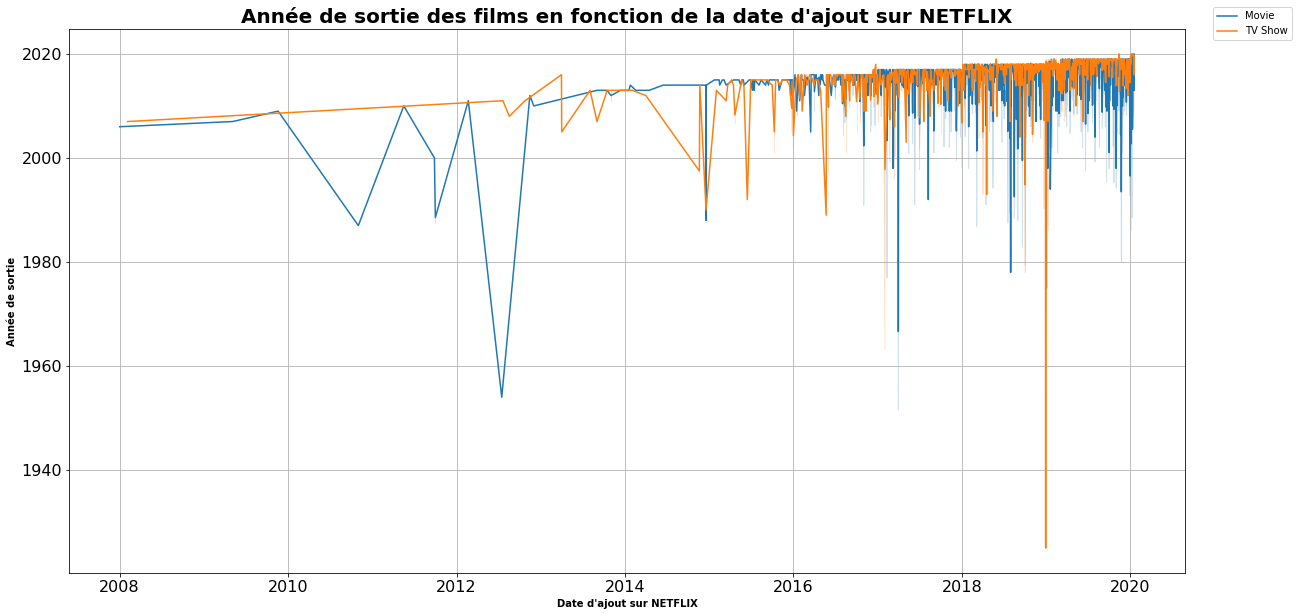

In [84]:
# utilisation de Line plot
fig, ax = plt.subplots(figsize=(20, 10))
# utilisation de grille
plt.grid()
# Affichage du graphe pour le dataset Movie
sns.lineplot(movie['date_added'], movie['release_year'])
# Affichage du graphe pour le dataset TV Show
sns.lineplot(tv_show['date_added'], tv_show['release_year'])

ax.set_title('Année de sortie des films en fonction de la date d\'ajout sur NETFLIX', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Date d\'ajout sur NETFLIX', fontsize = 10, fontdict=dict(weight='bold'))
ax.set_ylabel('Année de sortie', fontsize = 10, fontdict=dict(weight='bold'))
ax.legend(labels = ["Movie","TV Show"], bbox_to_anchor=(1.1, 1.05))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)


Ce graphique représente les années de sortie de film en fonction de la d'ajout sur Netflix.

On constate que Netflix s'est de plus en plus concentré sur les séries(émissions de télévision) et des films à partir de 2015.

On aperçoit, une très grosse différence avant 2015. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


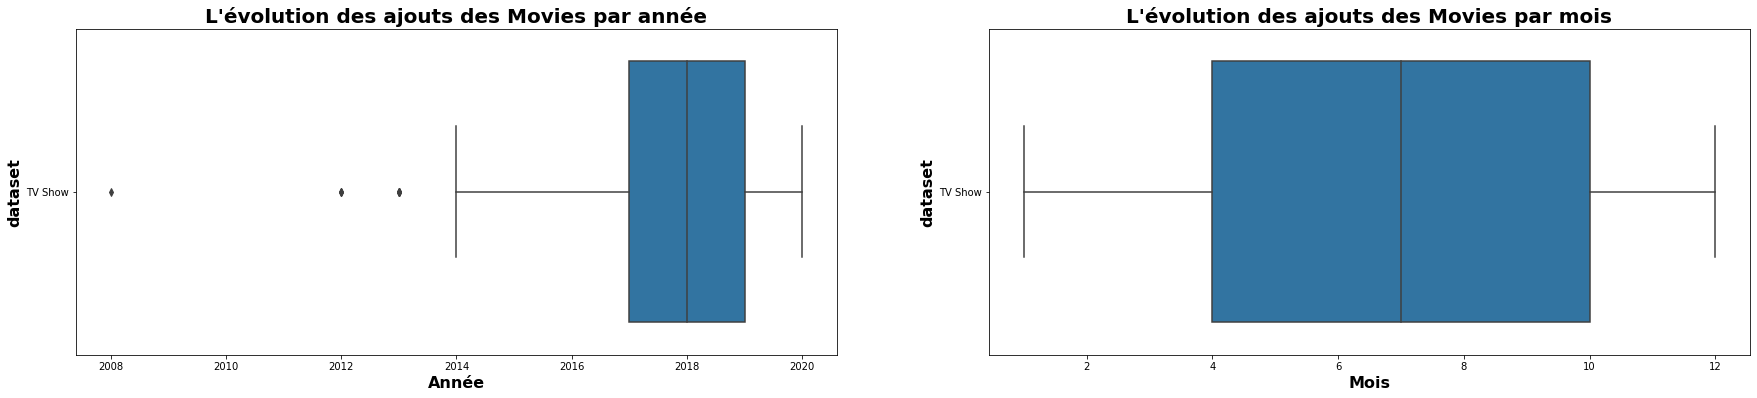

In [85]:
# Fonction qui retourne les évolutions des ajouts des movies ou tv shows par année et par mois

def boxPlot(ledataset, nomType):
  variable = "type"

  ledataset['Year'] = ledataset['date_added'].dt.year
  ledataset['Month'] = ledataset['date_added'].dt.month

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

  sns.boxplot(ledataset['Year'], ledataset[variable], ax=ax[0])
  ax[0].set_title('L\'évolution des ajouts des '+str(nomType)+' par année', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
  ax[0].set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
  ax[0].set_ylabel('dataset', fontsize = 16, fontdict=dict(weight='bold'))

  sns.boxplot(ledataset['Month'], ledataset[variable], ax=ax[1])
  ax[1].set_title('L\'évolution des ajouts des '+str(nomType)+' par mois', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
  ax[1].set_xlabel('Mois', fontsize = 16, fontdict=dict(weight='bold'))
  ax[1].set_ylabel('dataset', fontsize = 16, fontdict=dict(weight='bold'))

boxPlot(tv_show,"TV Show")

Nous constatons qu'il manque 128 noms de **director** (Réalisateurs), 360 noms de **cast**, 195 noms de pays et une date d'ajout sur netflix. 

## Analyse des données sur les différents pays
Dans cette partie, nous allons analysé les données dans les différents pays.


In [88]:
# On crée une copie de données
pays = data[data['country'] != ''].copy()
pays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 633.1+ KB


In [89]:
# On liste les valeurs possibles des types
pays['country'].unique()

array(['United States, India, South Korea, China', 'United Kingdom',
       'United States', 'Spain', 'Bulgaria, United States, Spain, Canada',
       'Chile', 'United States, United Kingdom, Denmark, Sweden', nan,
       'Netherlands, Belgium, United Kingdom, United States',
       'France, Belgium', 'United States, Uruguay', 'United States,',
       'Thailand', 'China, Canada, United States',
       'Belgium, United Kingdom, United States', 'Belgium, France',
       'India', 'France', 'United States, Canada', 'Pakistan', 'Canada',
       'United Kingdom, France', 'United States, United Kingdom',
       'South Korea', 'Denmark, United States',
       'United Kingdom, United States', 'Turkey, United States', 'Brazil',
       'Denmark, France, Italy, Belgium, Netherlands', 'Indonesia',
       'China', 'Ireland, United Kingdom', 'Turkey', 'Hong Kong',
       'France, Morocco', 'Hong Kong, China', 'Mexico',
       'United States, Mexico', 'Vietnam', 'France, Canada',
       'Spain, Argent

Text(0.5, 1.0, 'Les Top 10 des pays qui ont le plus de programme Netflix')

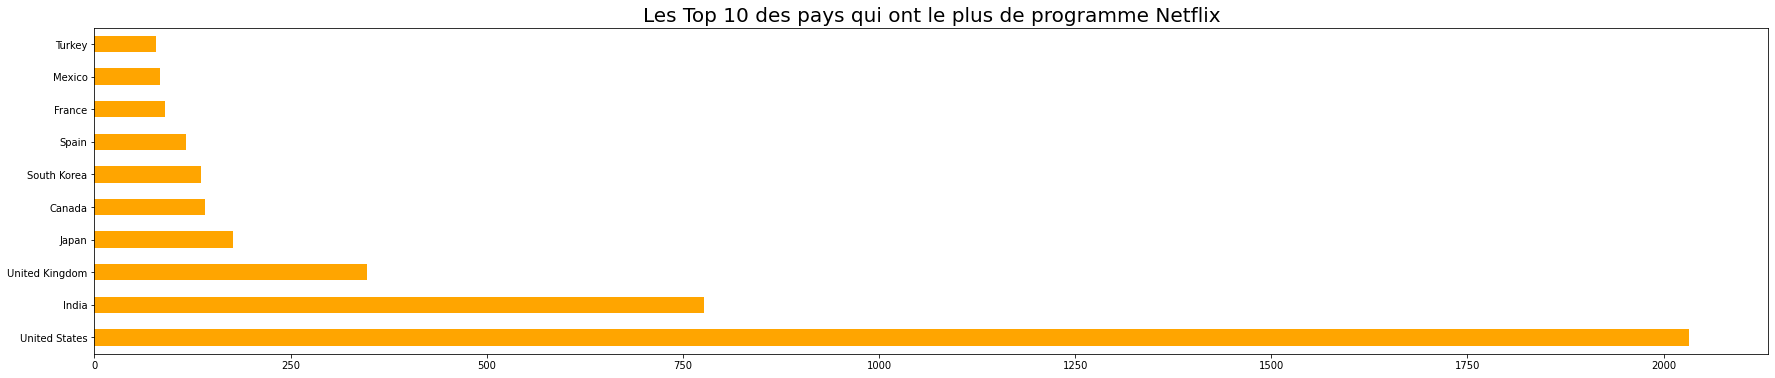

In [90]:
# Les Top 10 des pays qui ont le plus de programme Netflix
plt.figure(figsize=(30,6))
data['country'].value_counts()[:10].plot(kind="barh", color="orange")
plt.title('Les Top 10 des pays qui ont le plus de programme Netflix', size=20)

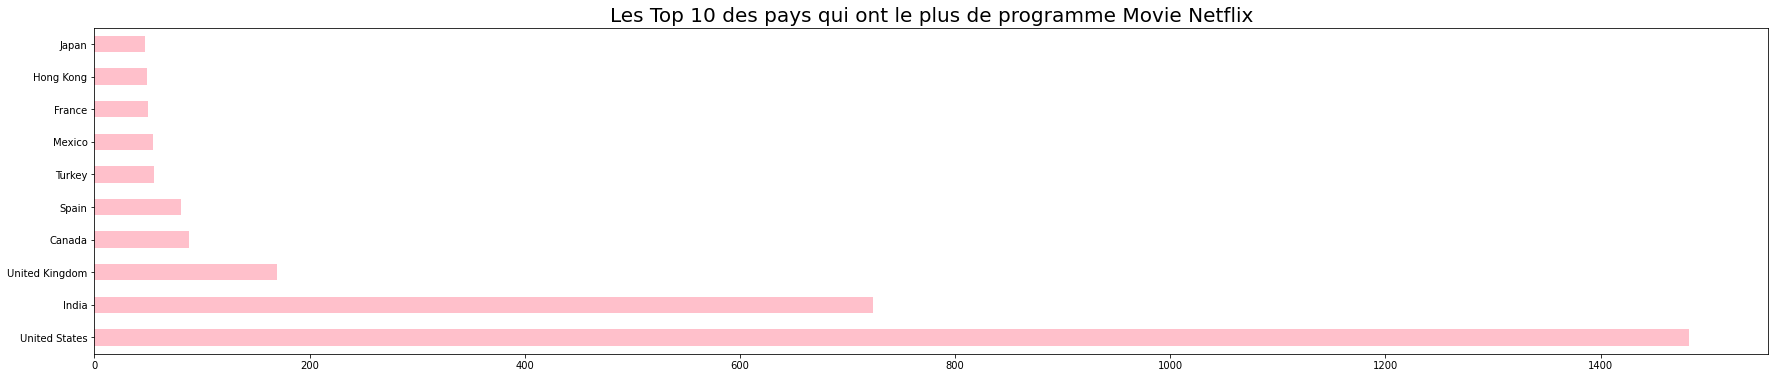

In [92]:
# Les Top 10 des pays qui ont le plus de programme Movie ou TV Netflix
def top10MovieorTvshow(ledata, nomType):
  plt.figure(figsize=(30,6))
  ledata['country'].value_counts()[:10].plot(kind="barh", color="pink")
  plt.title('Les Top 10 des pays qui ont le plus de programme '+str(nomType)+' Netflix', size=20)
top10MovieorTvshow(movie, "Movie")